In [1]:
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
datasource='dataset_metadata.csv'
df = pd.read_csv(datasource, low_memory=False)

In [3]:
class DatasetMetadataExplorer(object):
  def __init__(self, df, data_dir='data/mnist/train'):
    self.df = df
    self.num_samples = len(self.df[self.df['epoch'] == 0])
    self.min_epoch = self.df['epoch'].min()
    self.max_epoch = self.df['epoch'].max()
    self.num_epochs = self.max_epoch - self.min_epoch + 1
    self.columns = list(self.df.keys())
    self.data_dir = data_dir

  def view_top_n_hardest(self, epoch=0, N=10, figsize=(20, 7)):
    large_losses = self.df[self.df['epoch'] == epoch].sort_values(by='loss_diff_from_avg', ascending=False)[:N]
    n_columns = 5
    n_rows = int(np.ceil(N / n_columns))
    fig = plt.figure(figsize=figsize)
    fig.suptitle('Epoch: {epoch}'.format(epoch=epoch), fontsize=25)
    for i, (_, row) in enumerate(large_losses.iterrows()):
      plt.subplot(n_rows, n_columns, i+1)
      fn = os.path.join(self.data_dir, row.filename)
      plt.imshow(plt.imread(fn), cmap='gray')
      plt.title('{fn}\nGT: {gt}, Pred: {p}, Loss: {l:.2f}'
                .format(fn=row.filename, gt=int(row.ground_truth), p=int(row.prediction), l=row.loss), 
                fontdict={'fontsize': 20})
      plt.axis('off')
    plt.show()

  def hist_of_loss_diff_from_avg(self, epoch=0, show_plot=True, **hist_kwargs):
    losses_diff_from_avg = self.df[self.df['epoch'] == epoch]['loss_diff_from_avg'].values
    plt.hist(losses_diff_from_avg, **hist_kwargs)
    plt.title('Diff of sample losses and avg. batch loss (Epoch {epoch})'.format(epoch=epoch))
    if show_plot:
      plt.show()

  def hist_of_loss(self, epoch=0, show_plot=True, **hist_kwargs):
    losses = self.df[self.df['epoch'] == epoch]['loss'].values
    plt.hist(losses, **hist_kwargs)
    plt.title('Sample losses (Epoch {epoch})'.format(epoch=epoch))
    if show_plot:
      plt.show()

  def all_hists_of_losses(self, loss_diff_from_avg=True, figsize=(15, 5), **hist_kwargs):
    epoch = self.min_epoch
    while self.max_epoch >= epoch:
      plt.figure(figsize=figsize)
      for i in range(2):
        plt.subplot(1, 2, i + 1)
        if loss_diff_from_avg:
          self.hist_of_loss_diff_from_avg(epoch=epoch, show_plot=False, **hist_kwargs)
        else:
          self.hist_of_loss(epoch=epoch, show_plot=False, **hist_kwargs)
        epoch += 1
        if epoch > self.max_epoch:
          break
      plt.show()

In [4]:
eda = DatasetMetadataExplorer(df)

### Top 20 Hardest to Classify Images per Epoch
"hard" is defined as a sample having large loss compared to the other samples in its batch, i.e.
`measurement = sample_loss - avg_batch_loss`

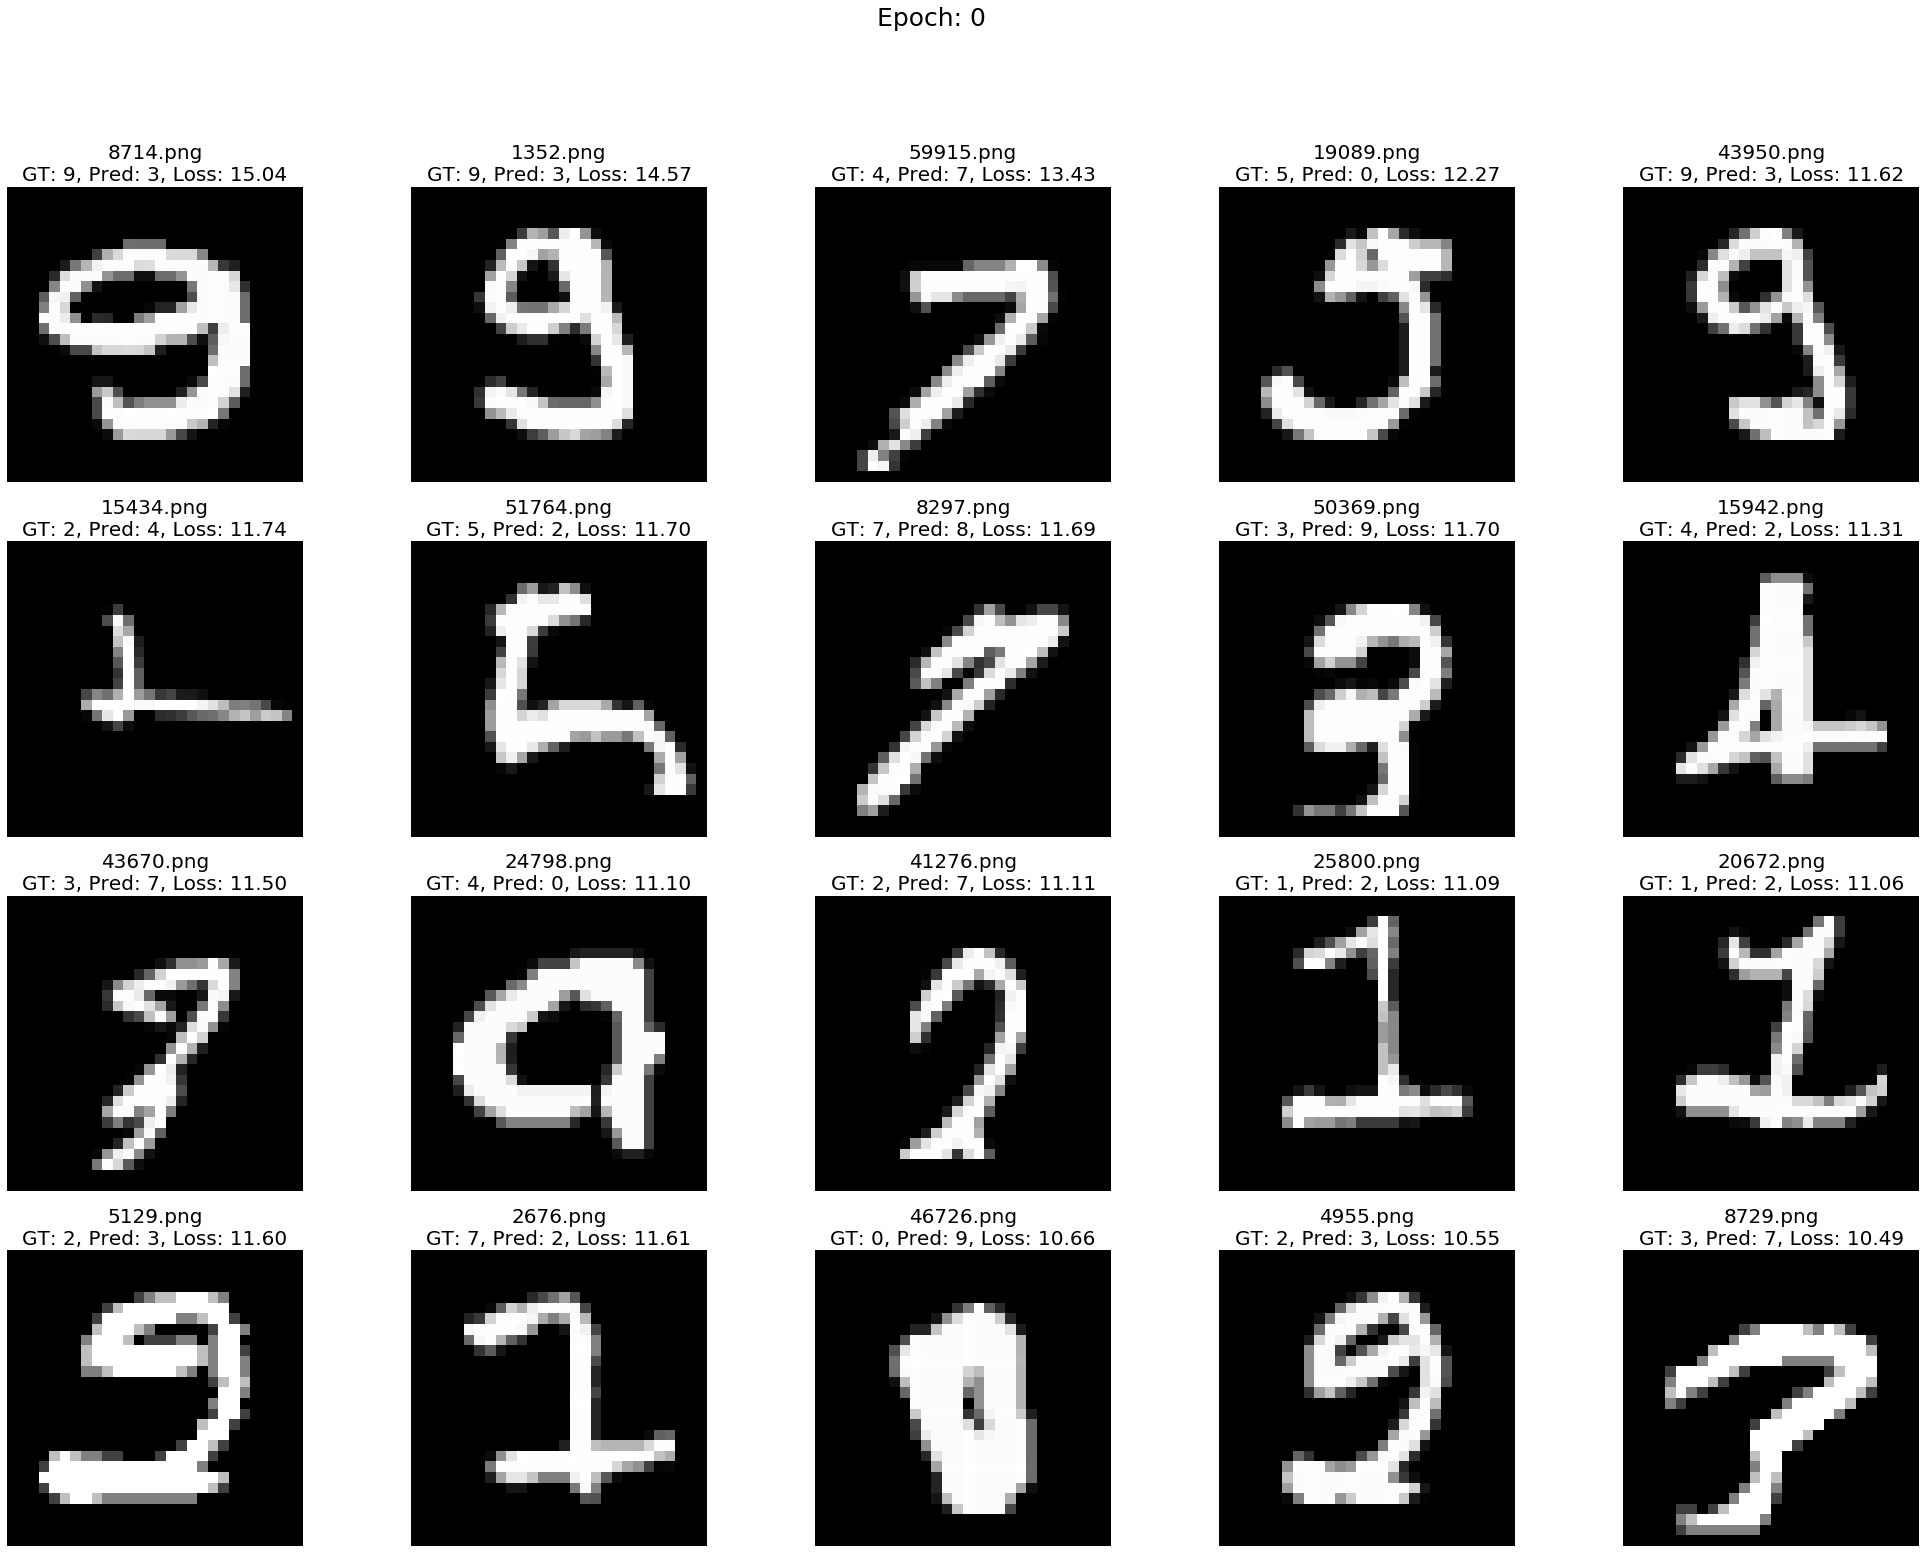

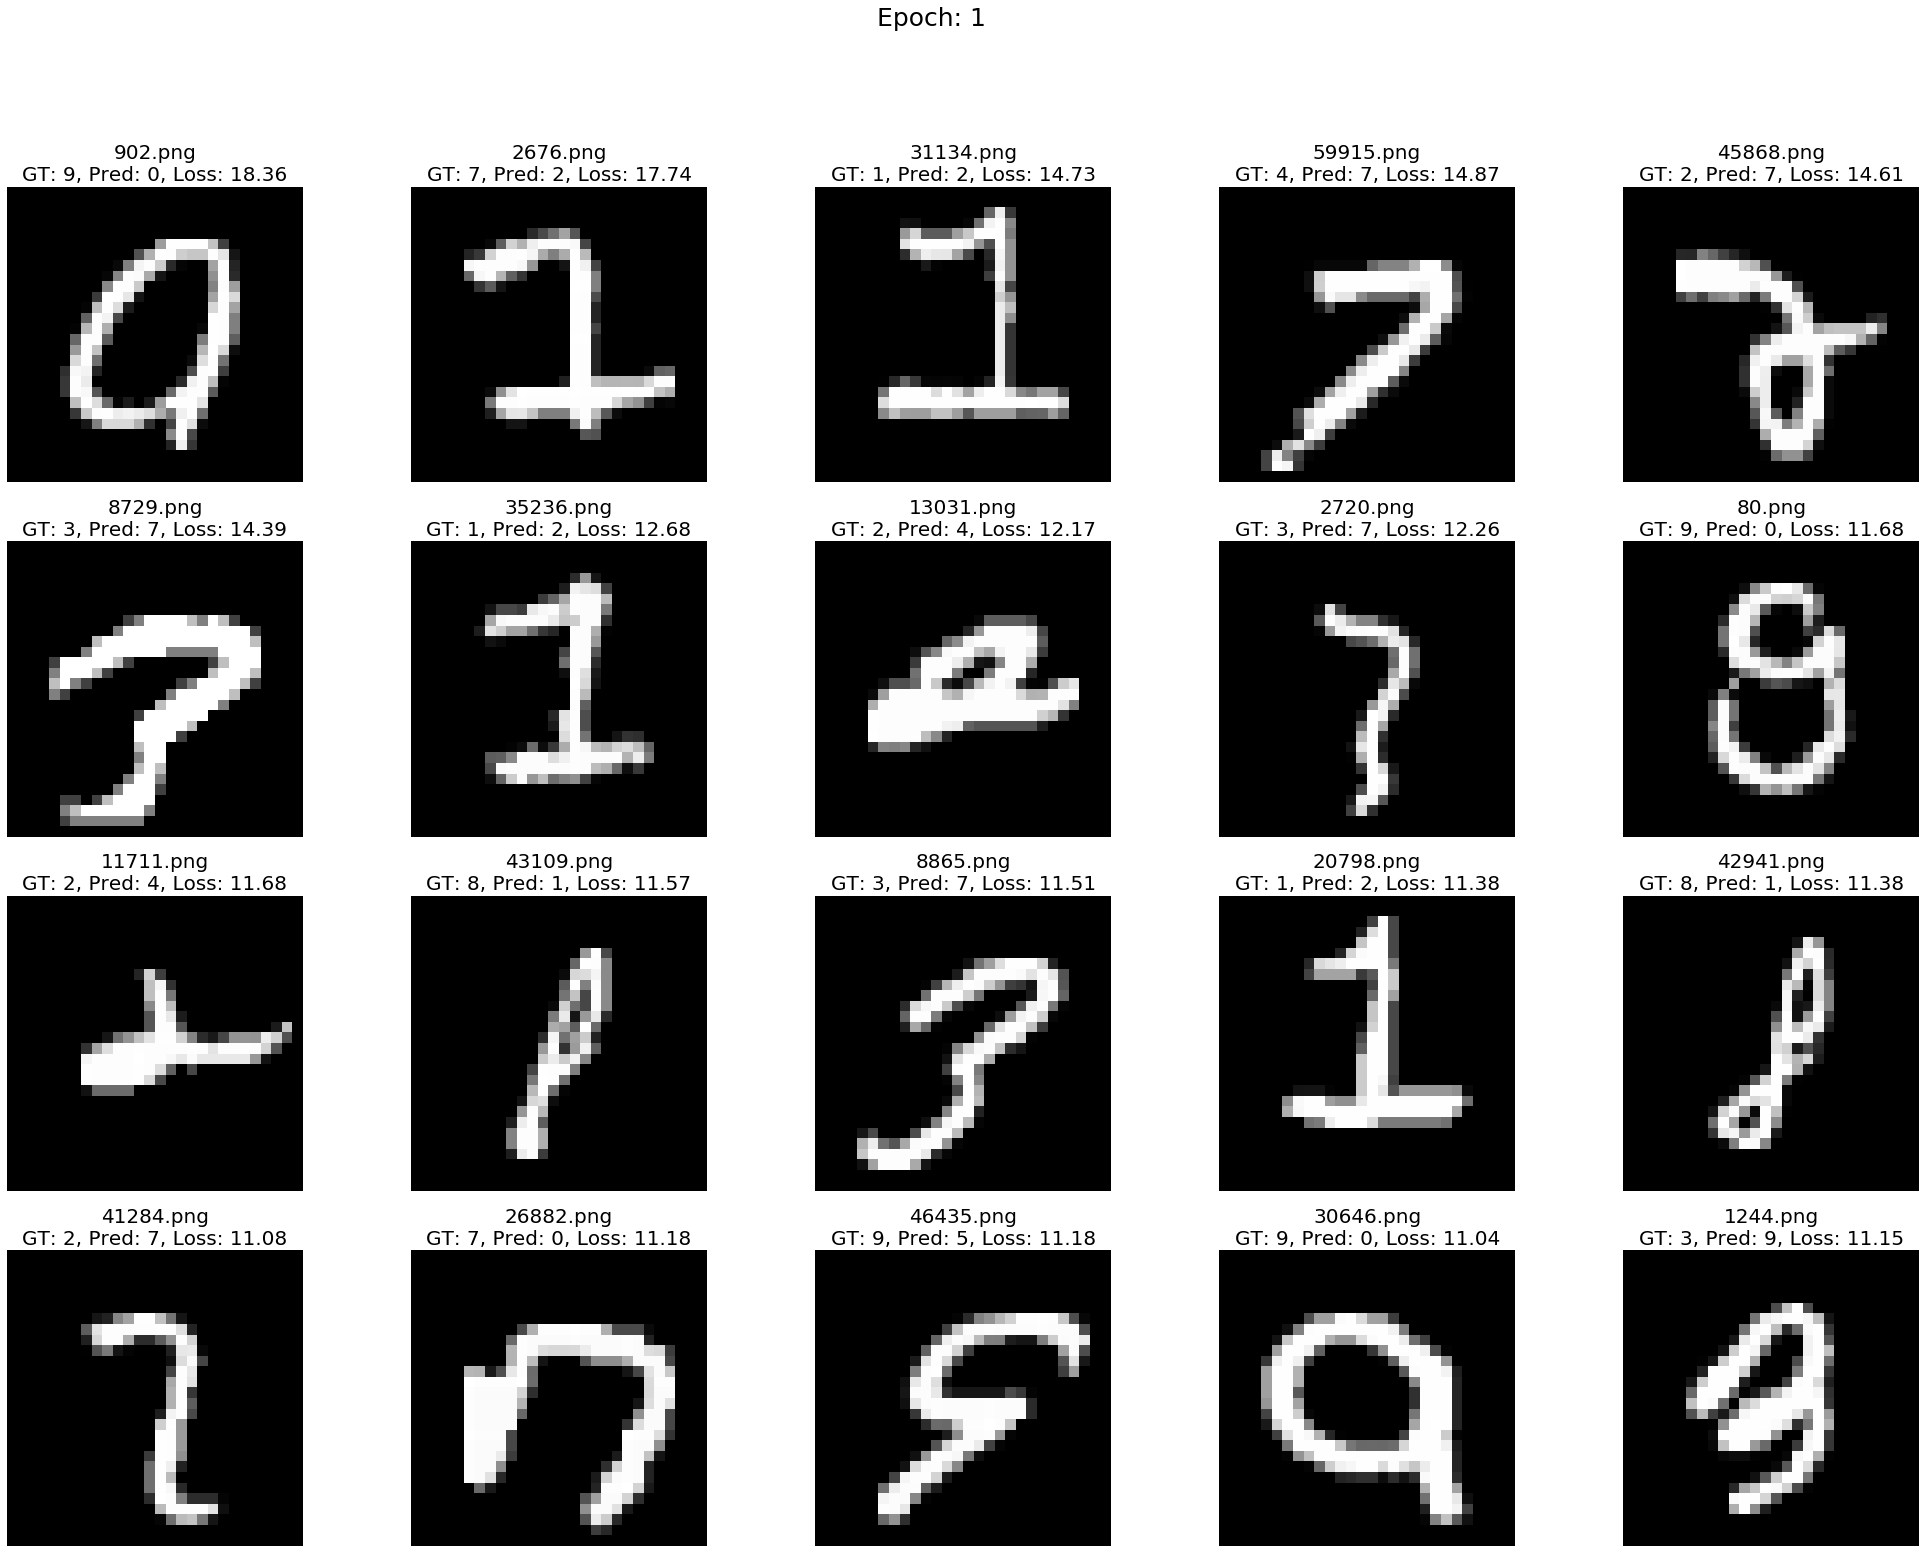

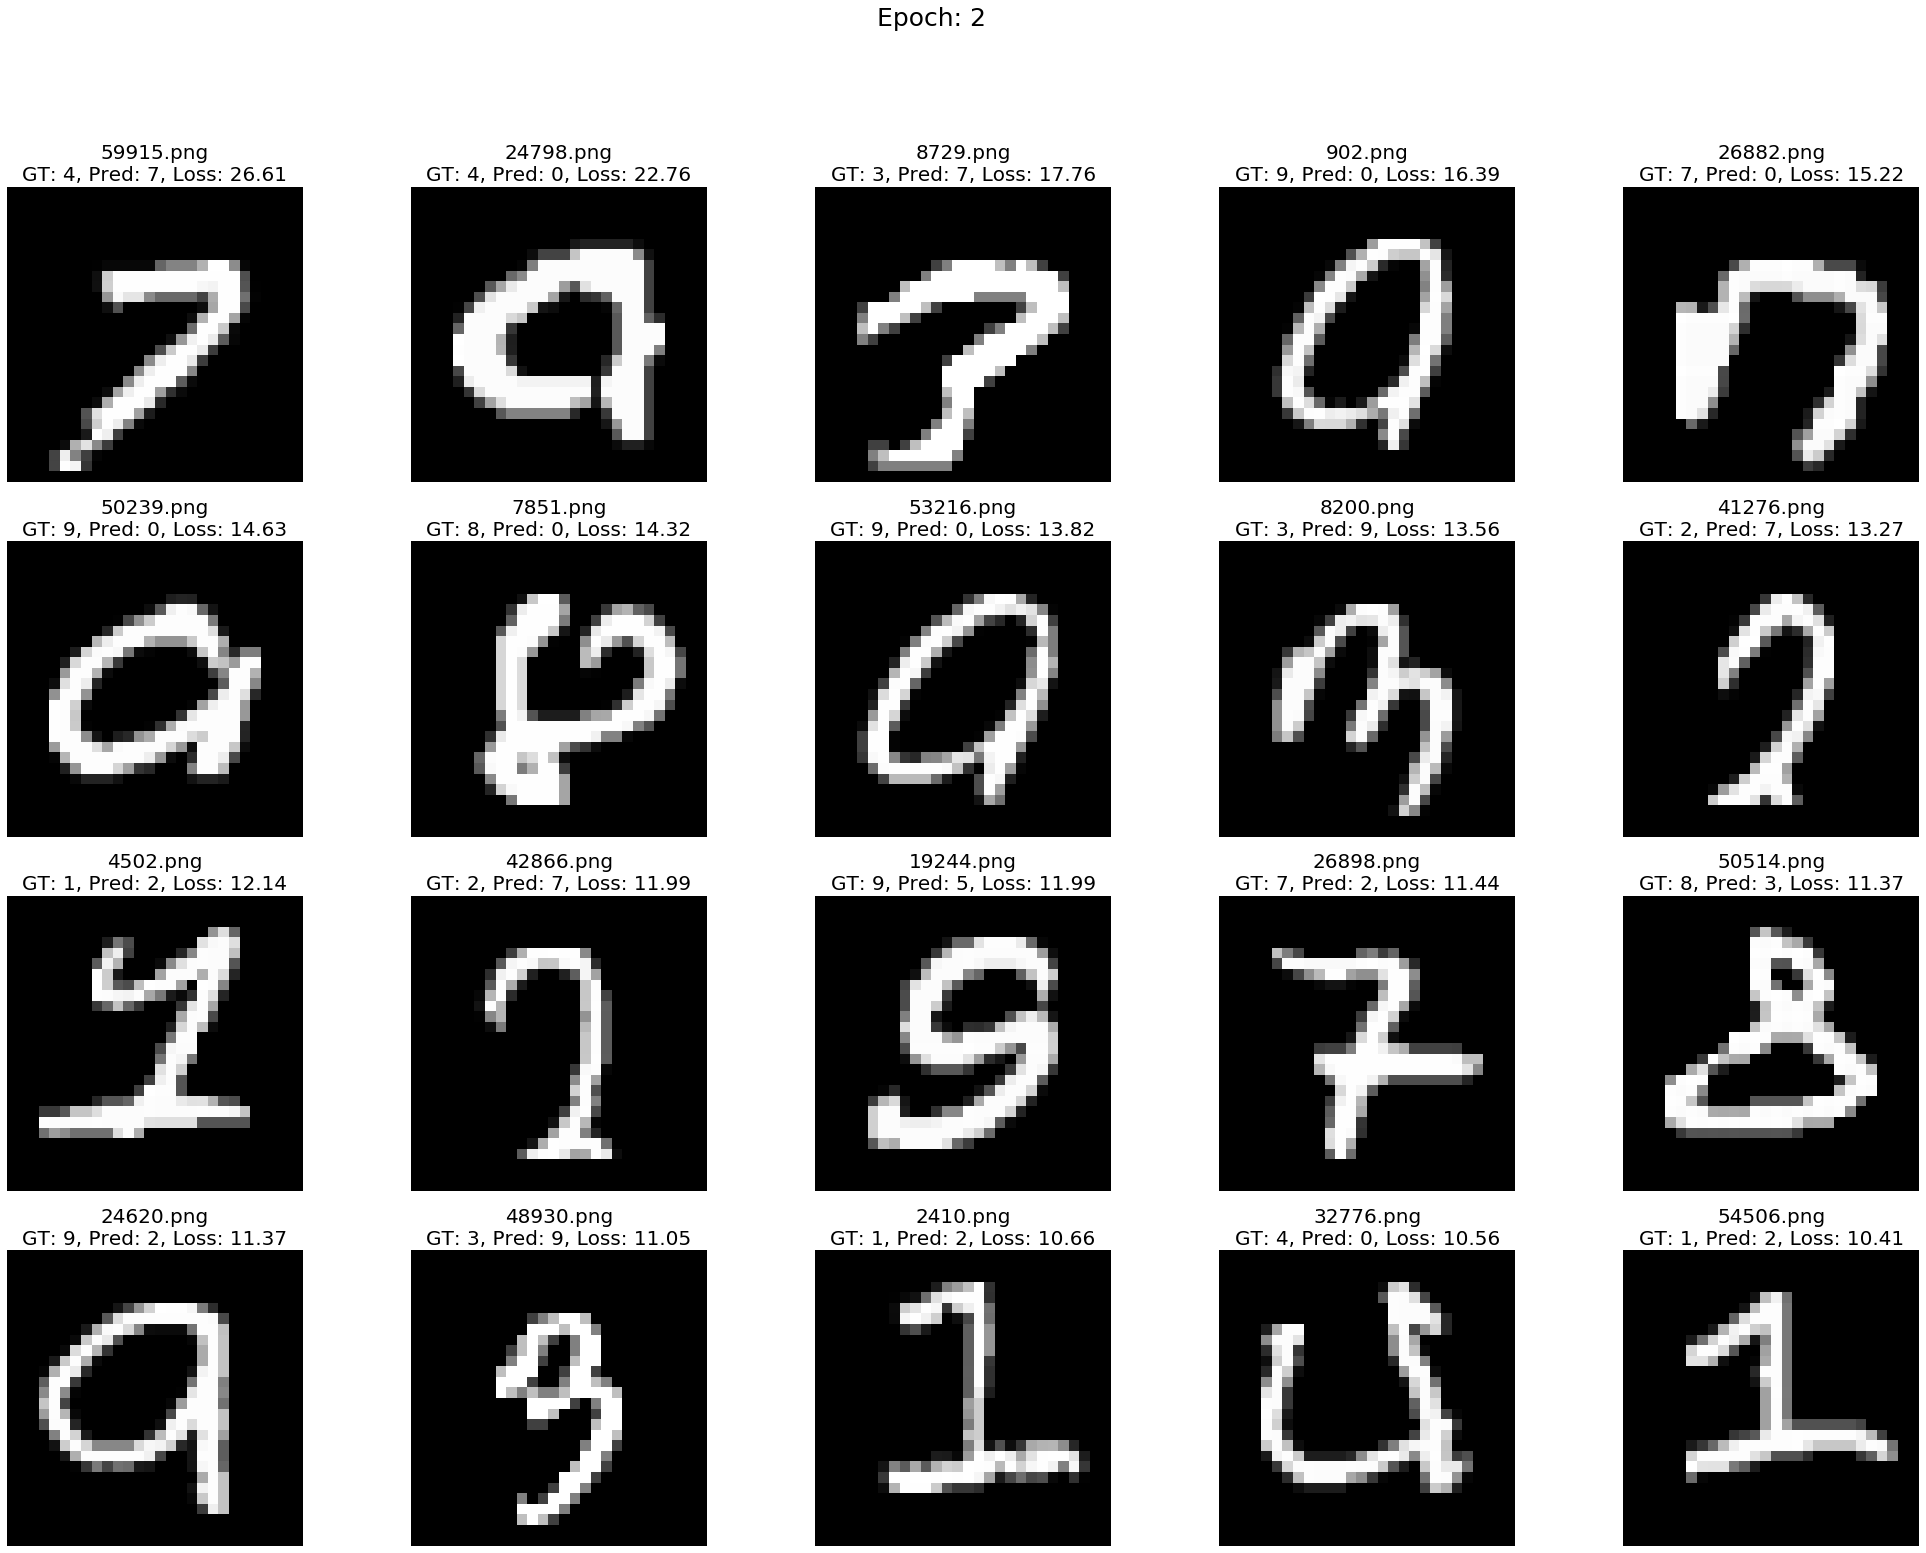

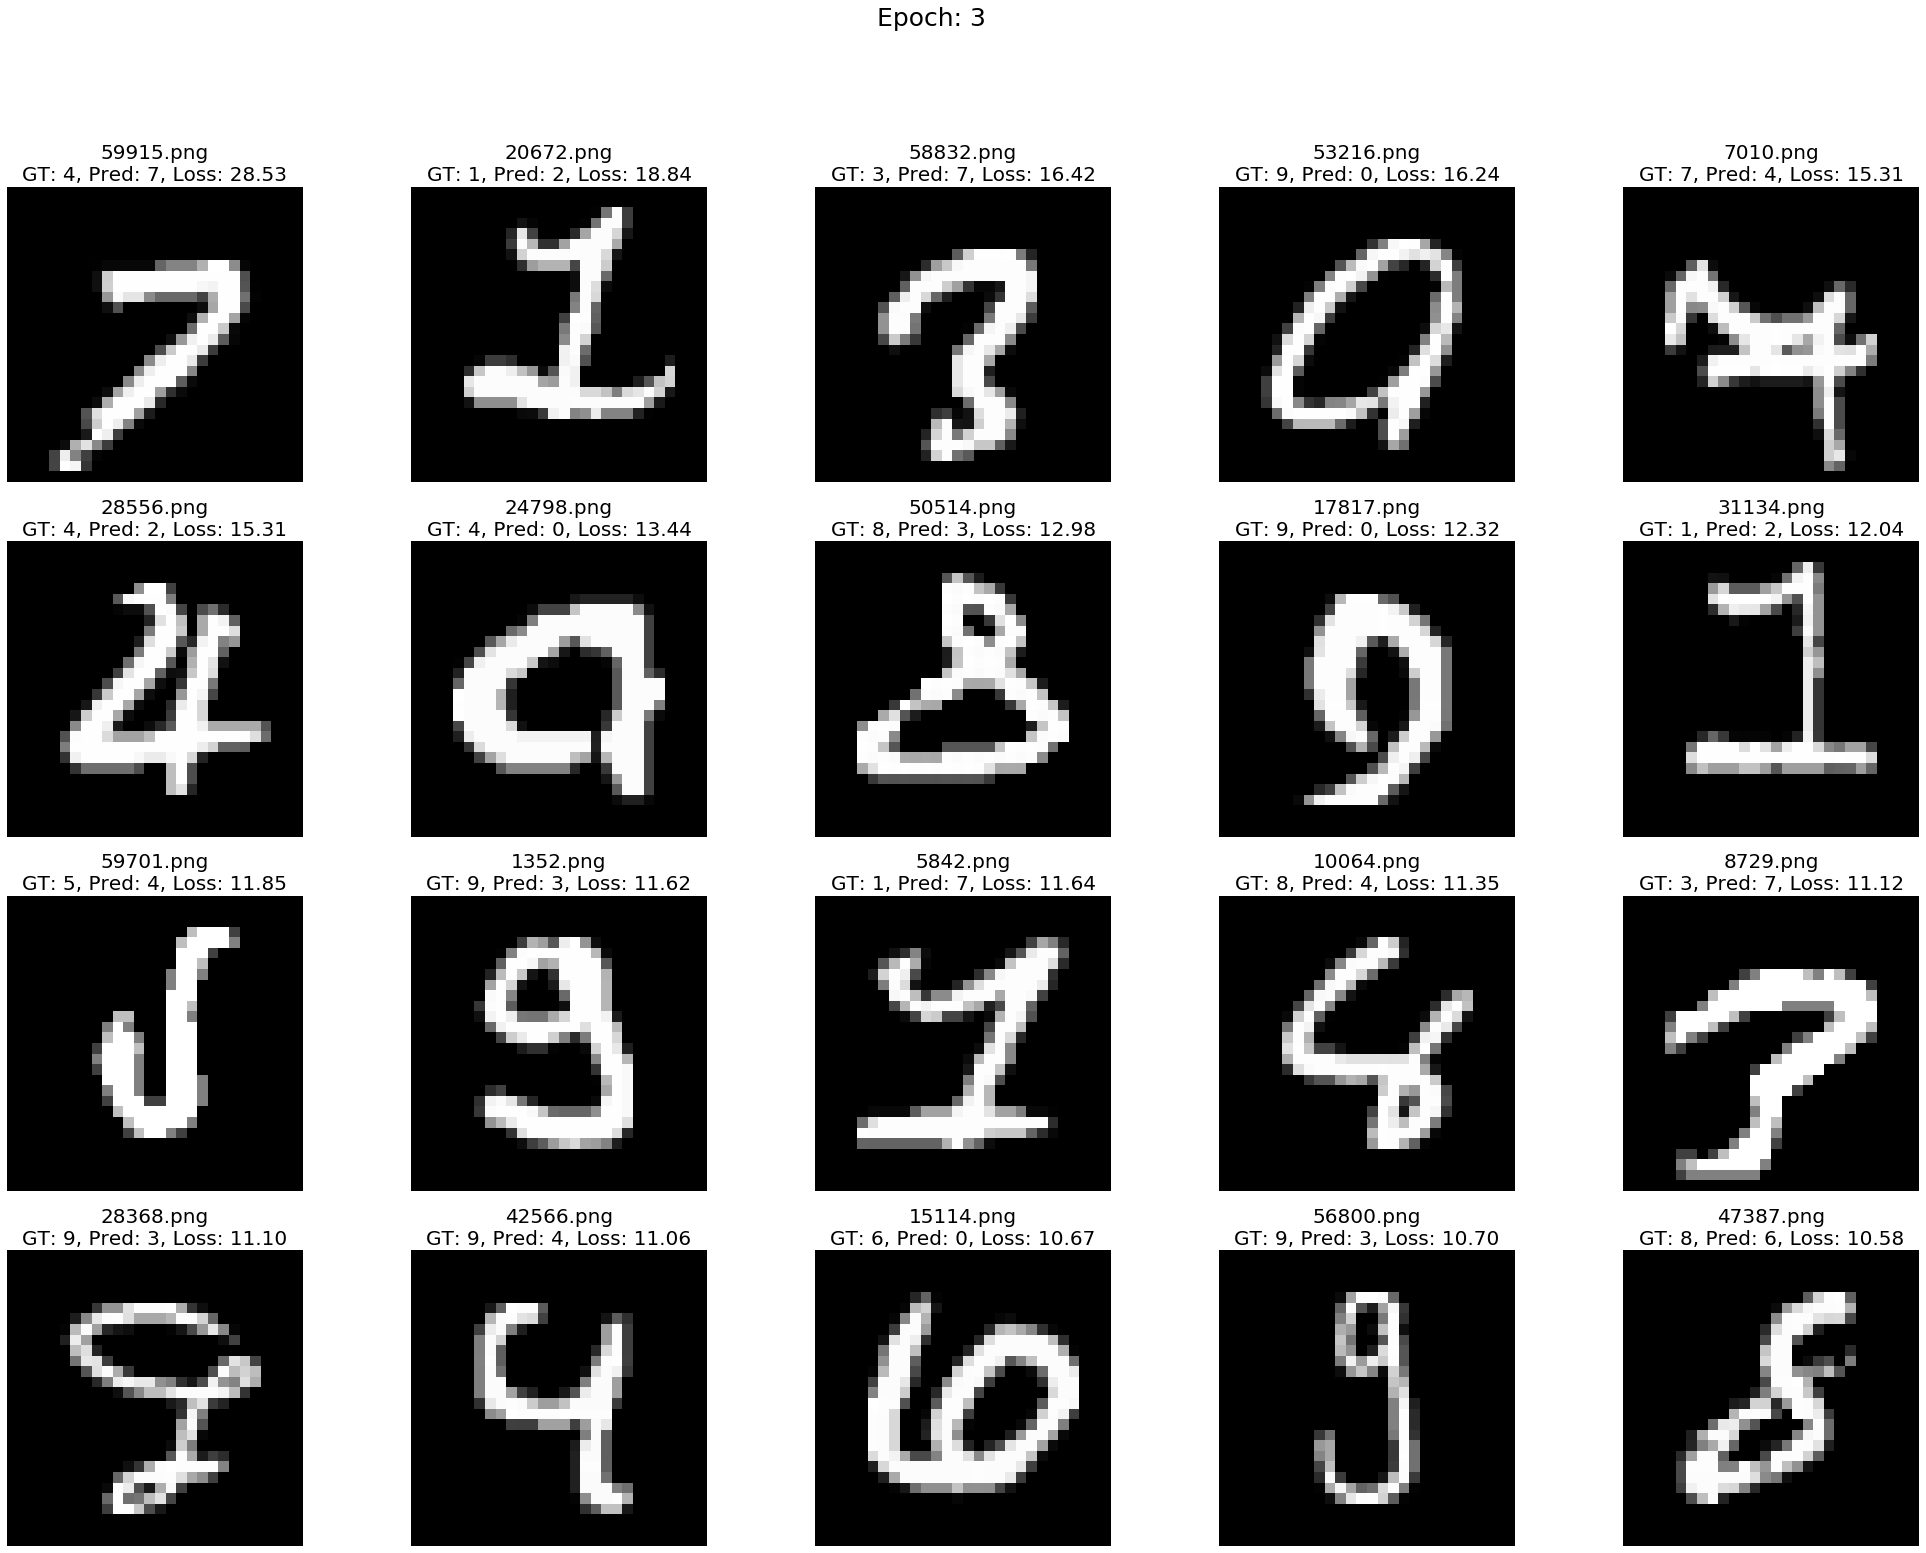

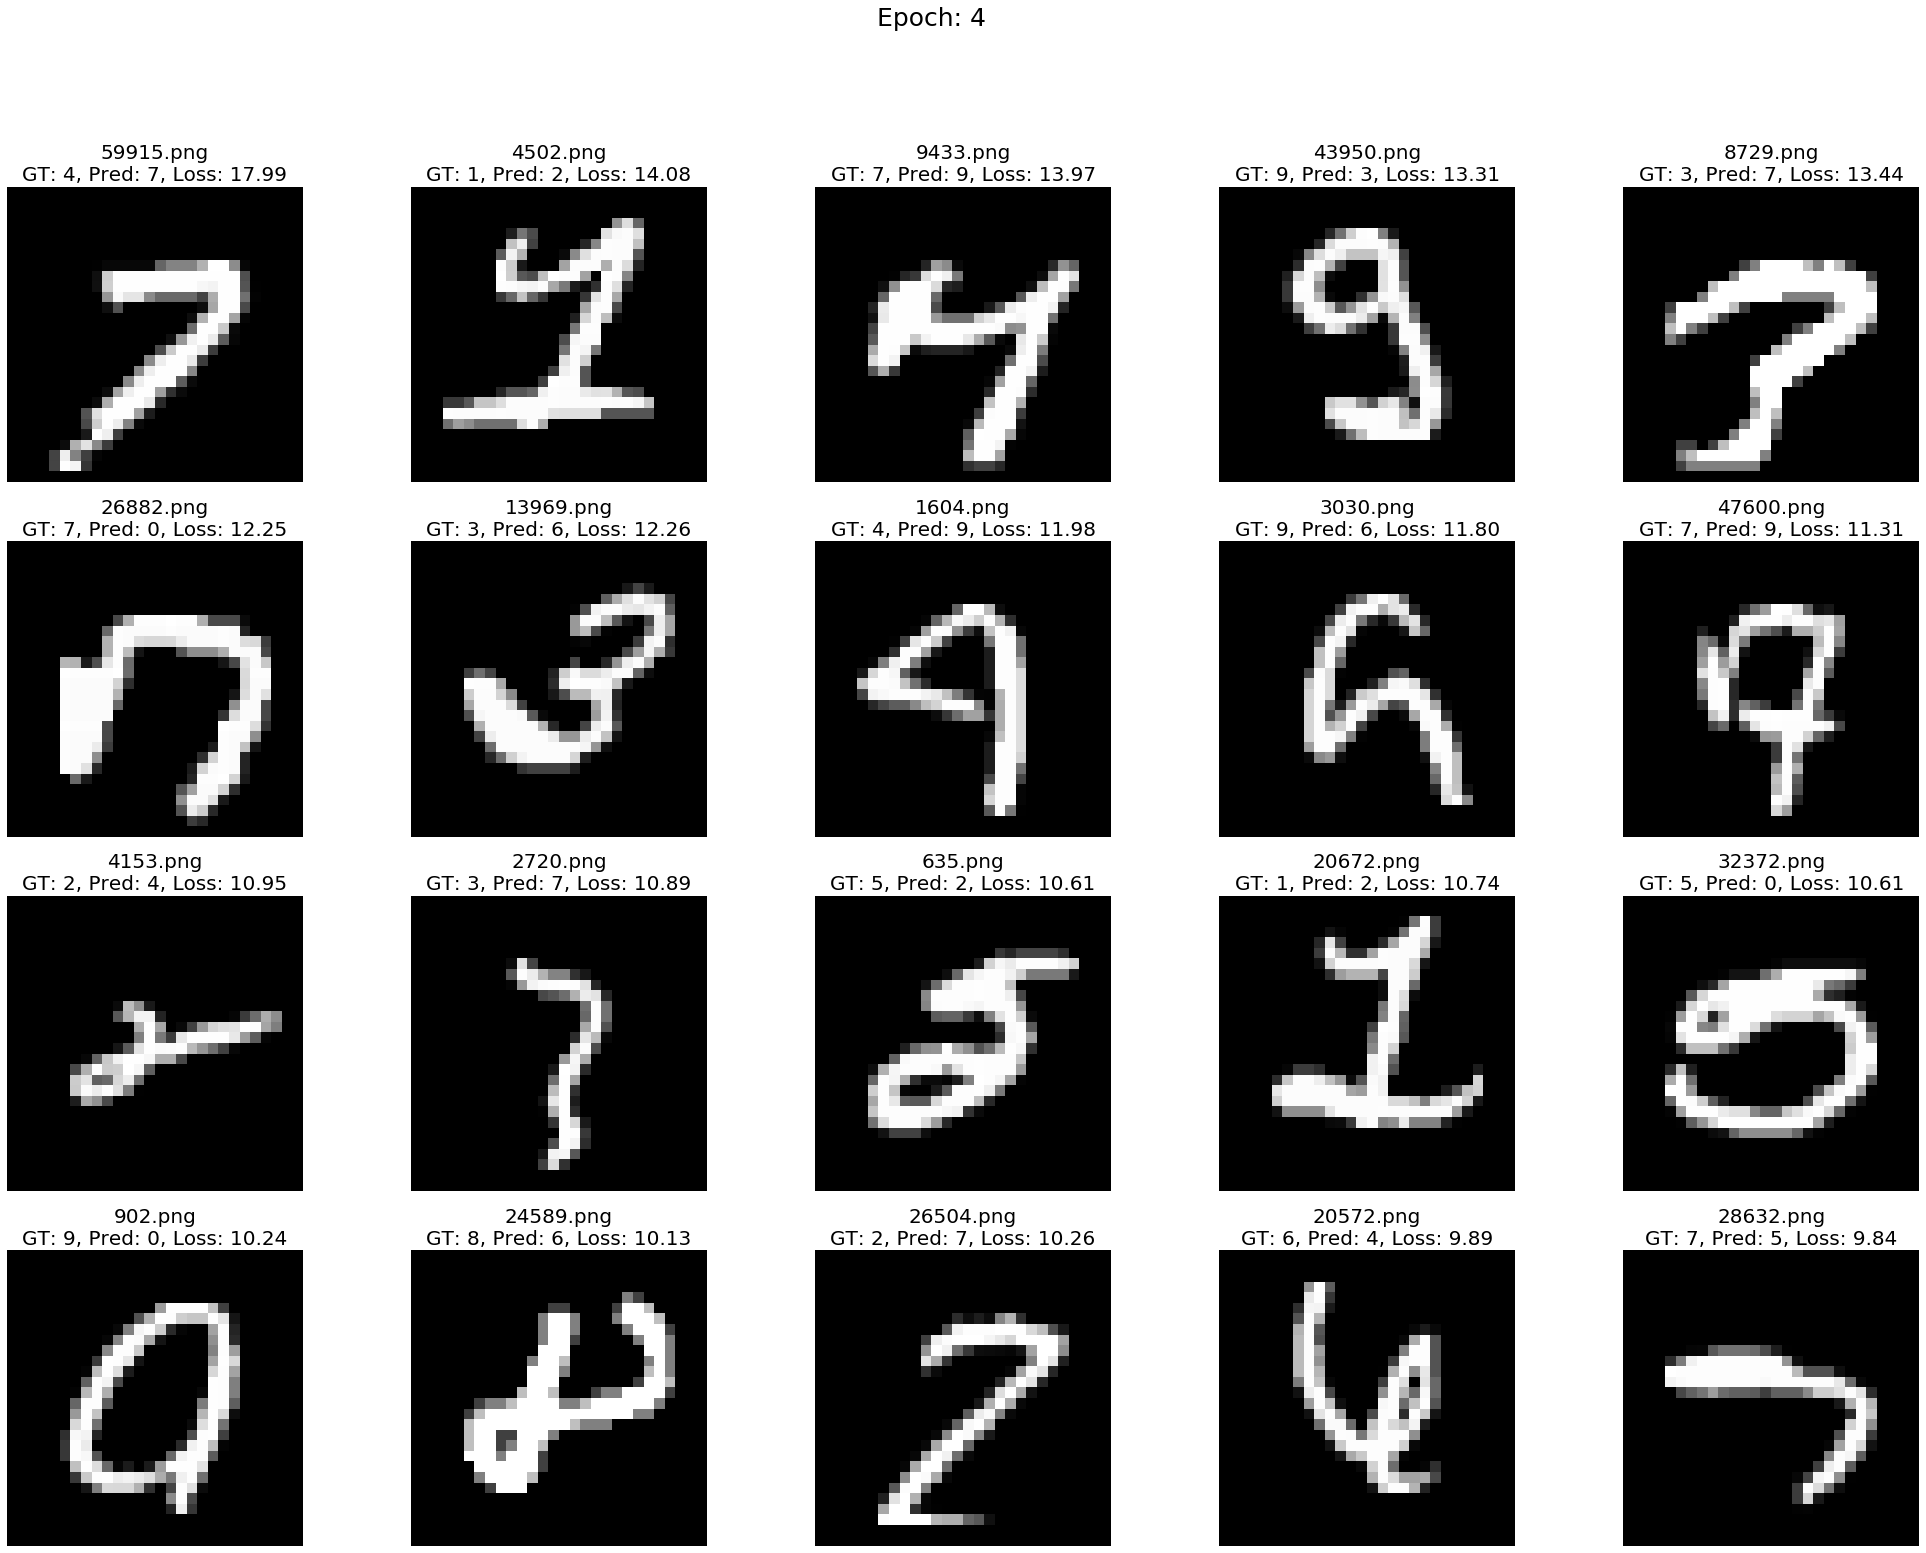

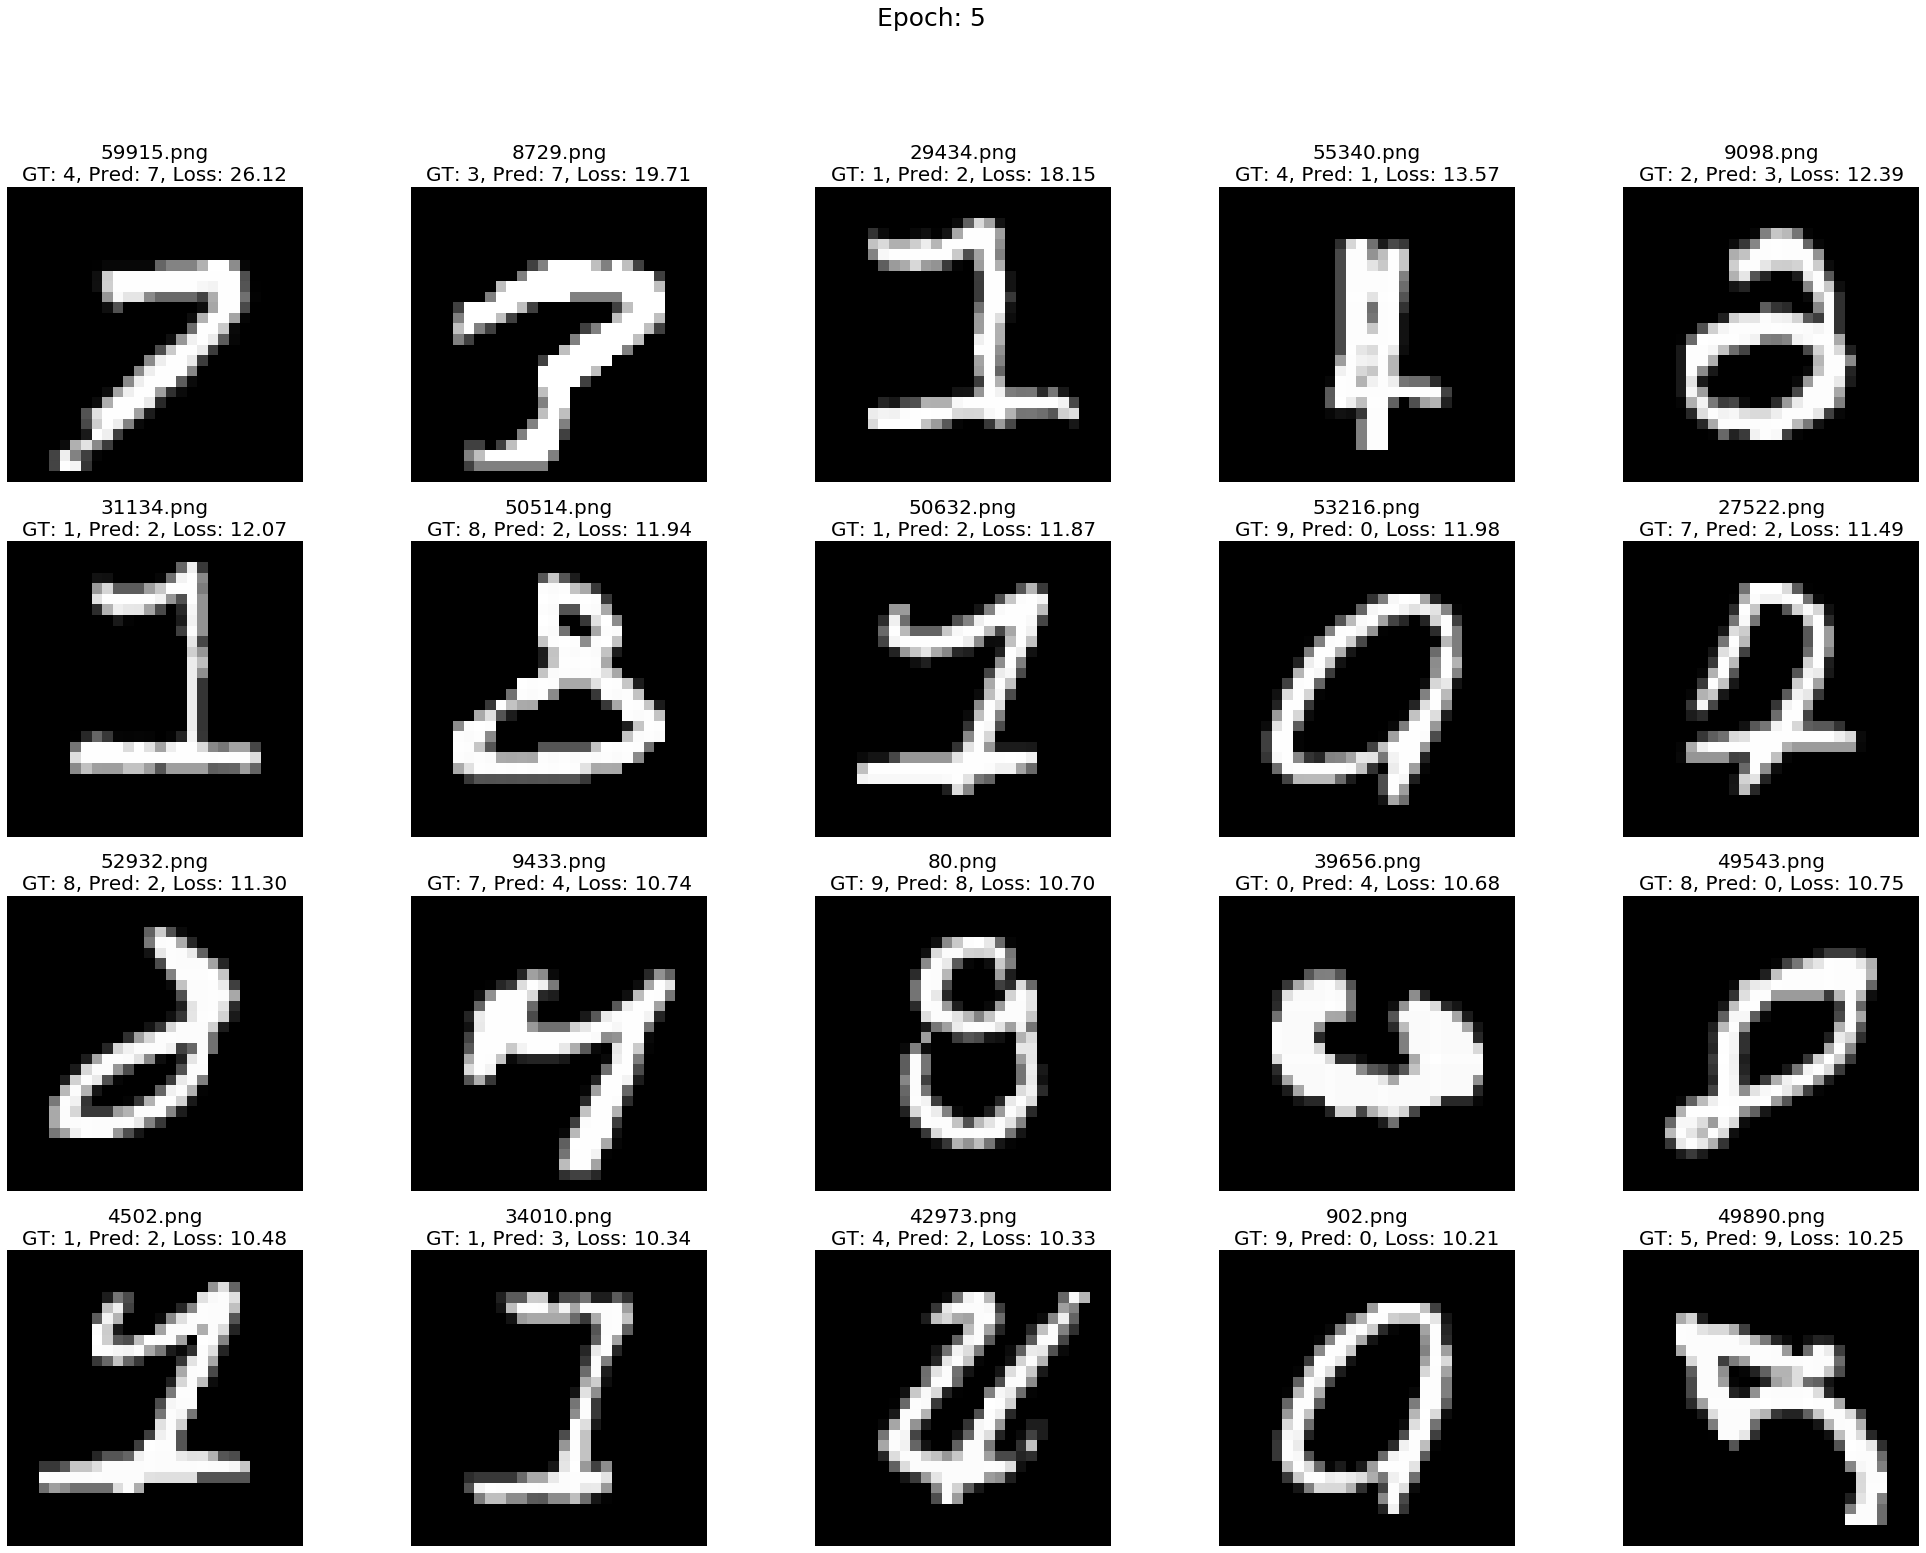

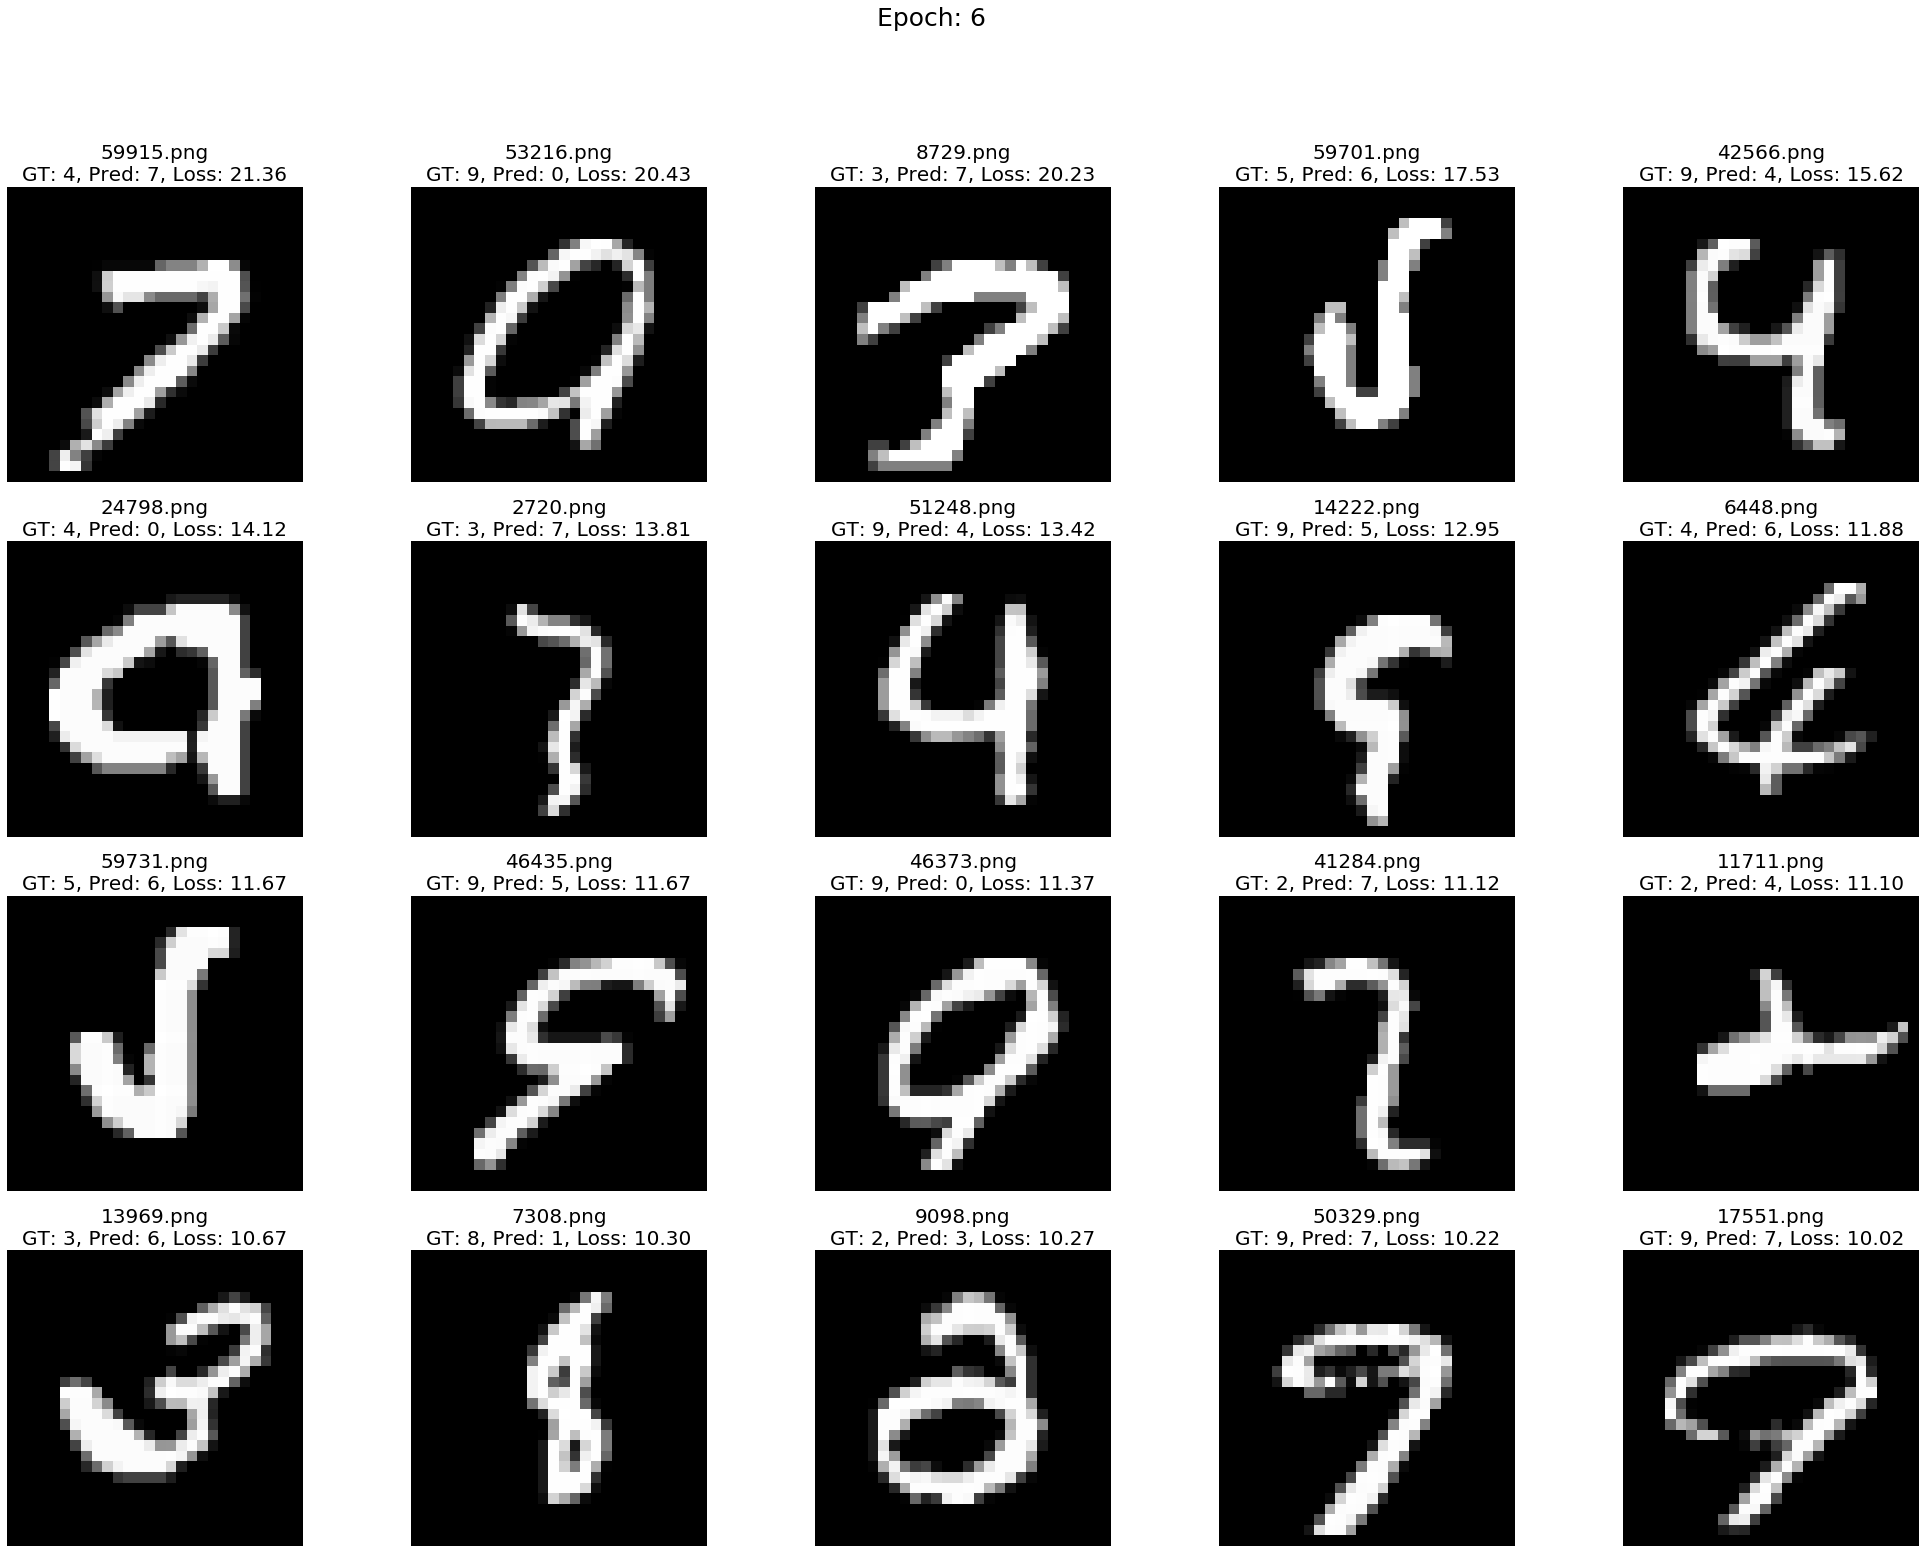

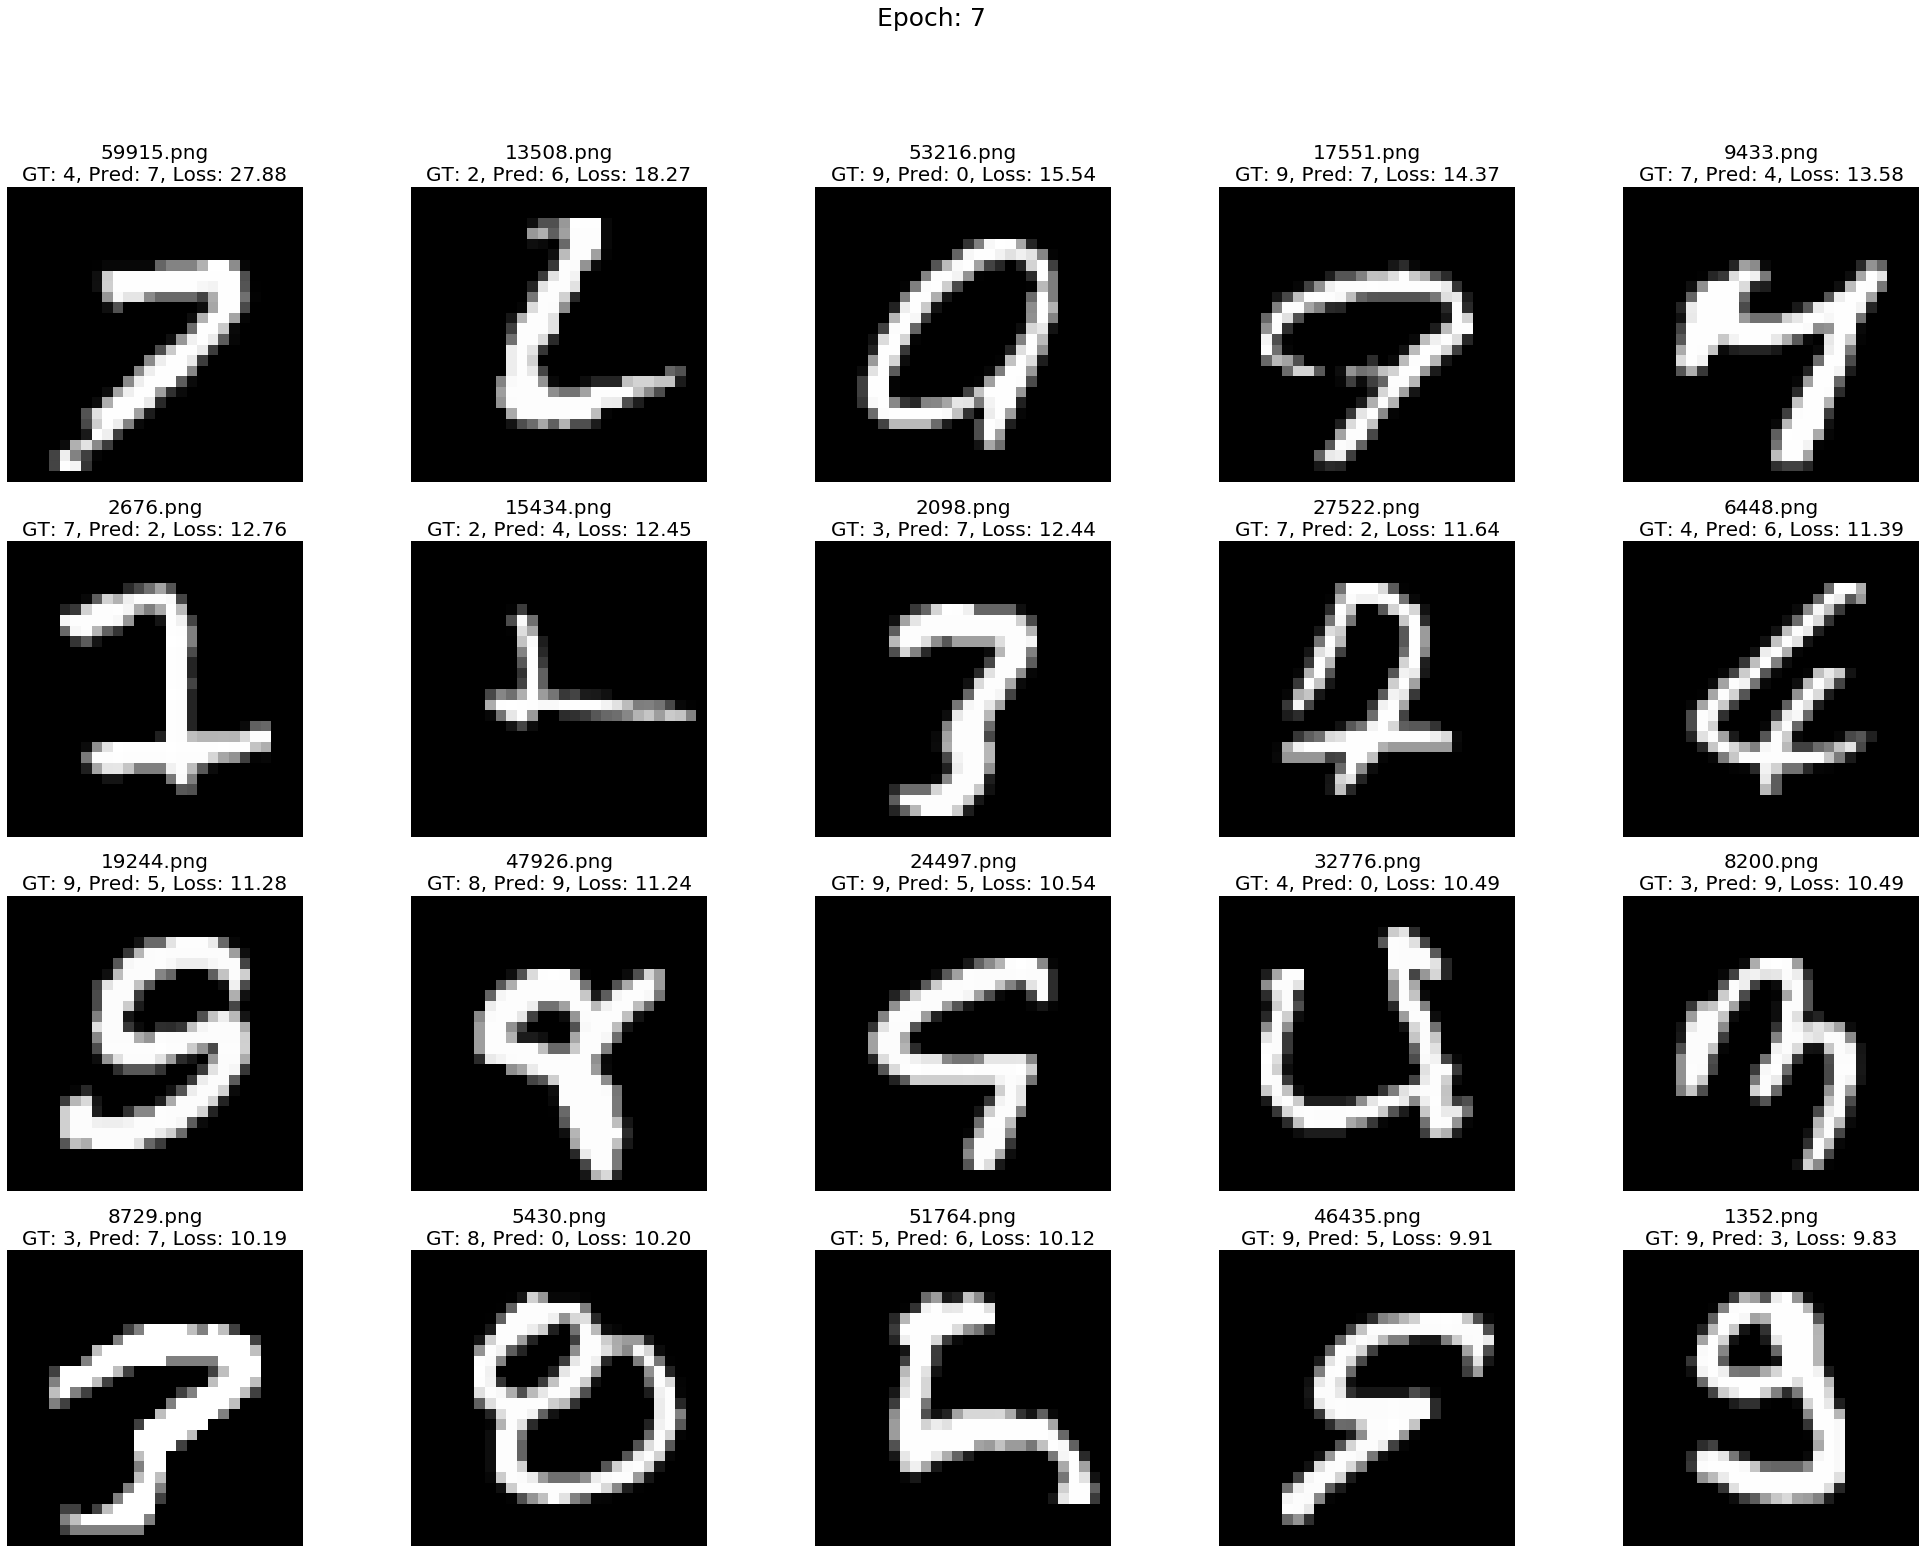

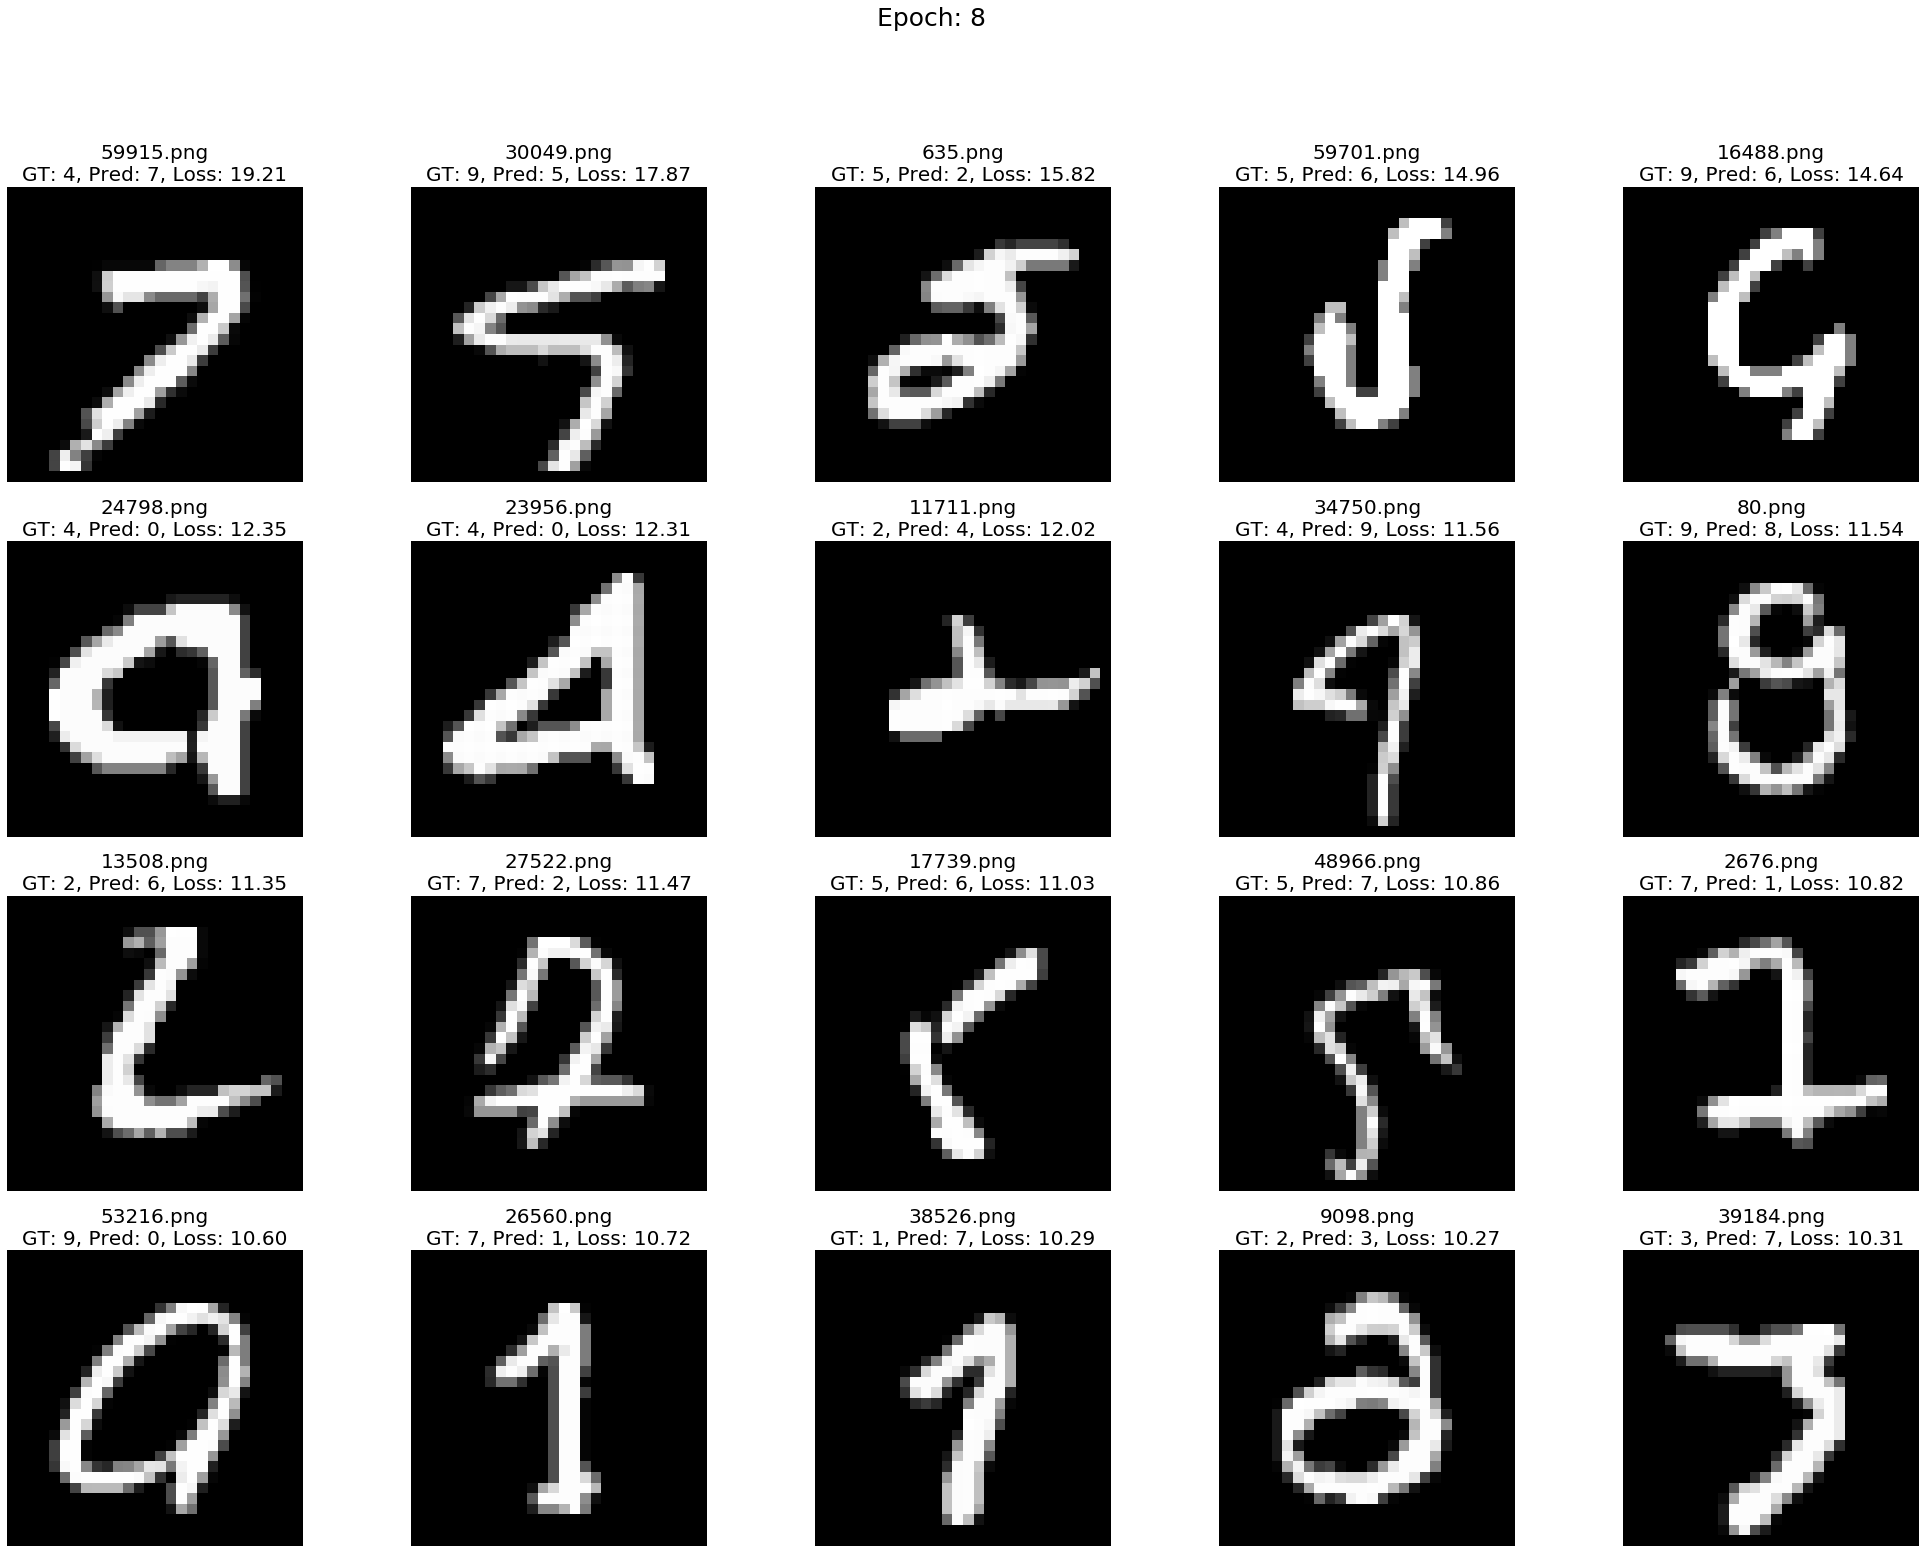

In [5]:
for epoch in range(eda.min_epoch, eda.max_epoch):
  eda.view_top_n_hardest(epoch=epoch, N=20, figsize=(35, 25))

### Standard Histogram

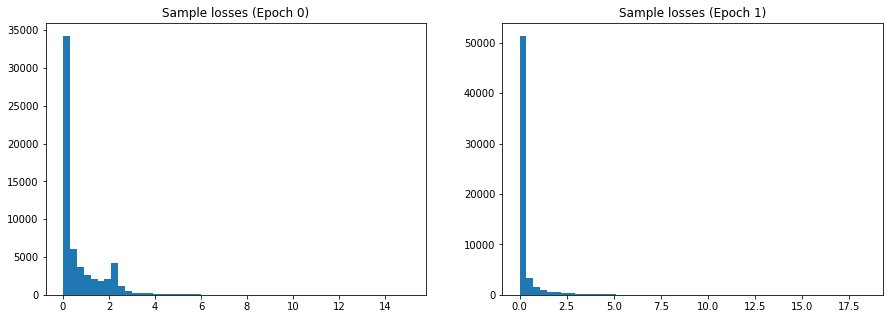

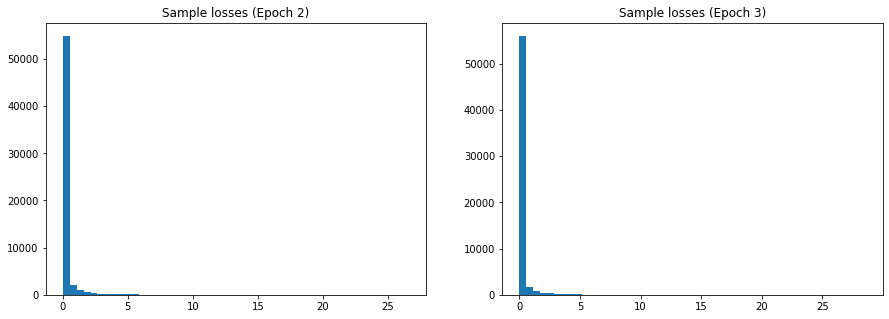

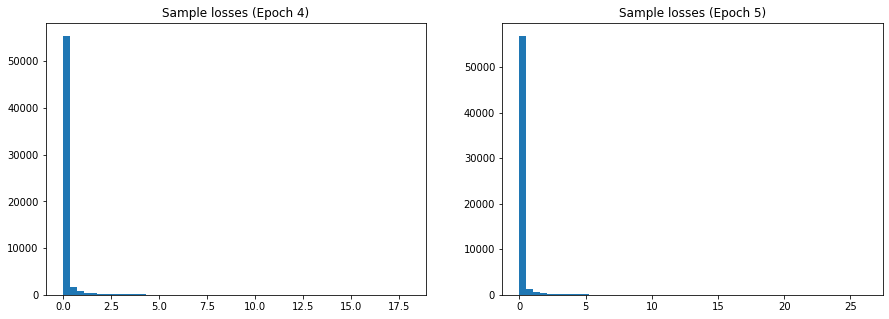

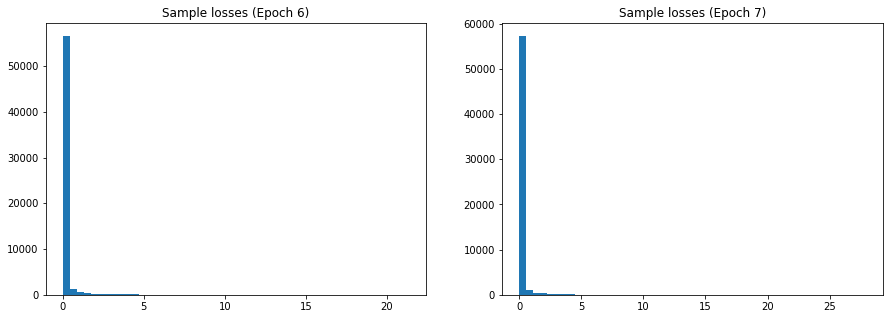

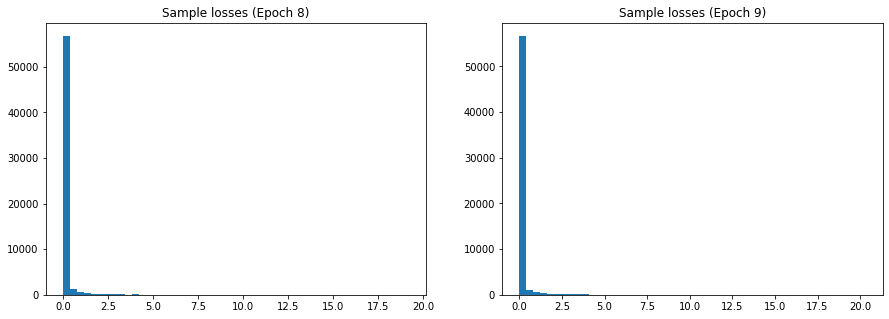

In [6]:
eda.all_hists_of_losses(loss_diff_from_avg=False, figsize=(15, 5), bins=50, log=False, cumulative=False, density=False)

### Log-scaled Histogram

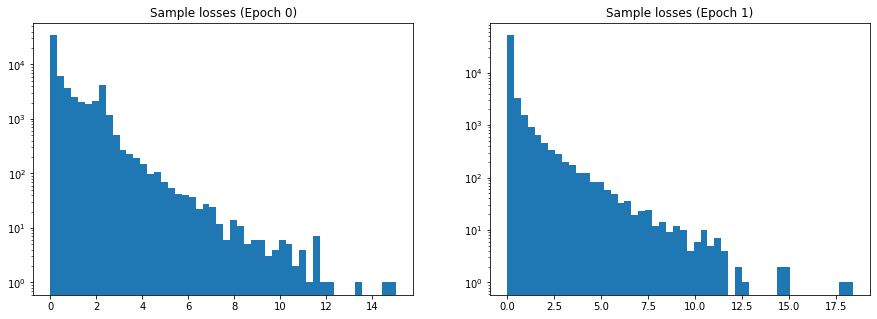

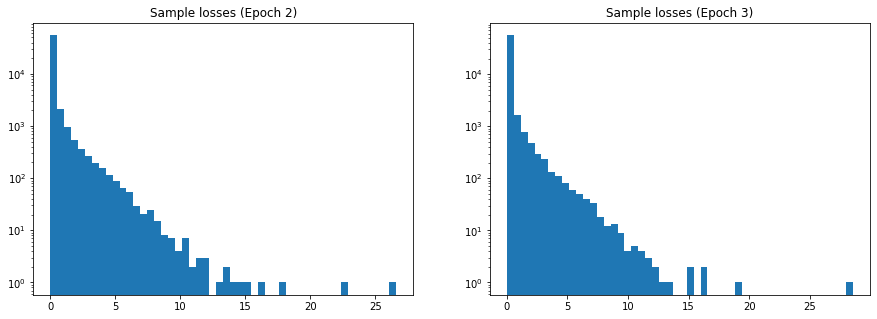

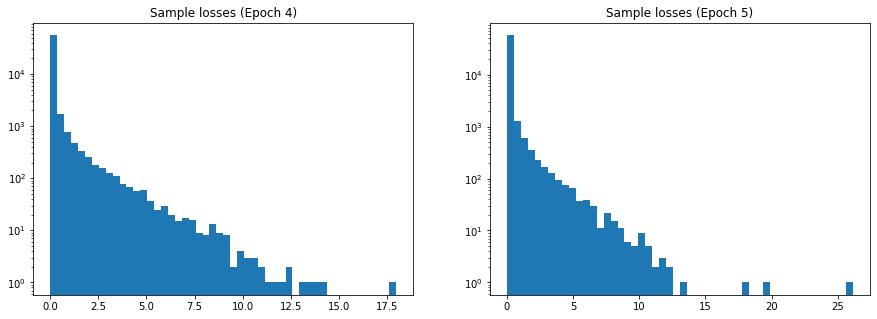

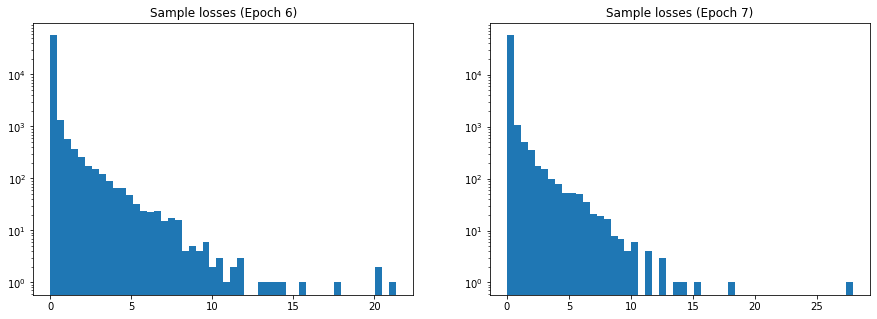

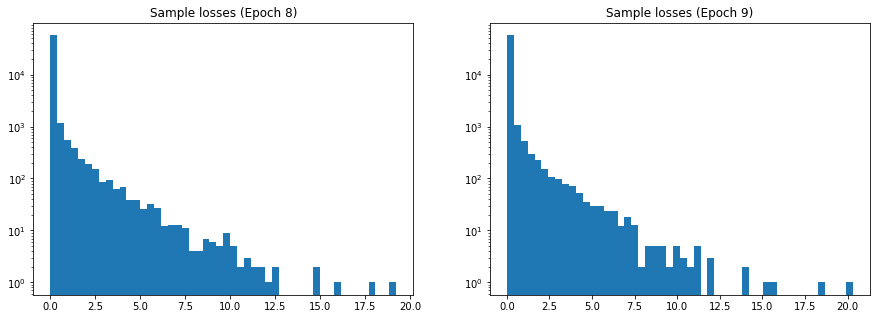

In [7]:
eda.all_hists_of_losses(loss_diff_from_avg=False, figsize=(15, 5), bins=50, log=True, cumulative=False, density=False)

### Cumulative Density Histogram

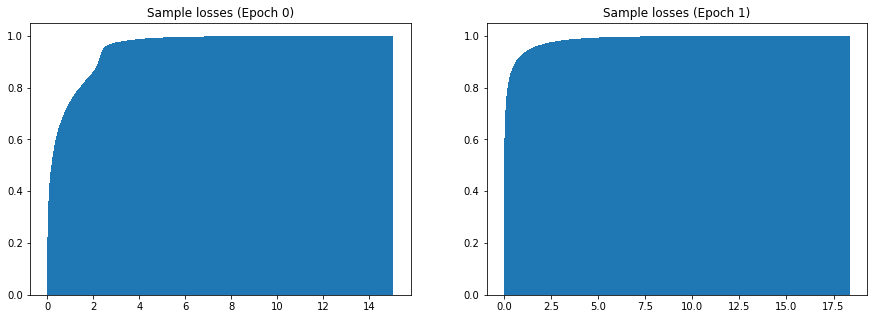

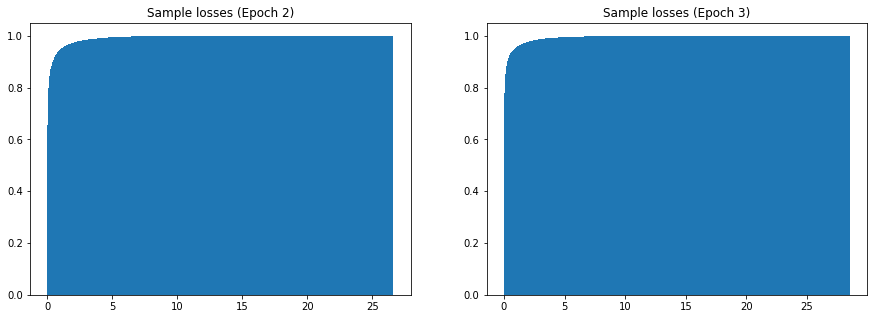

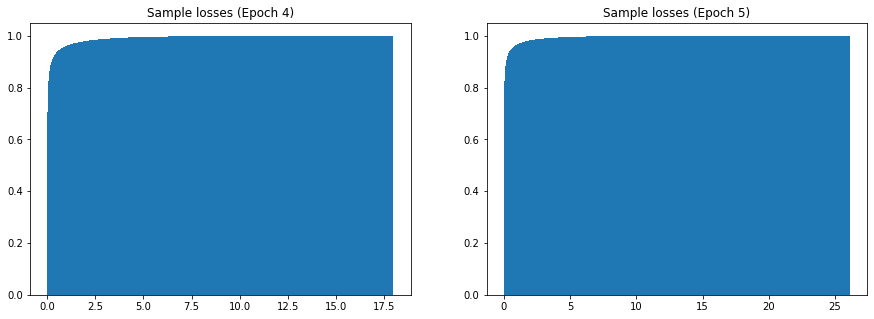

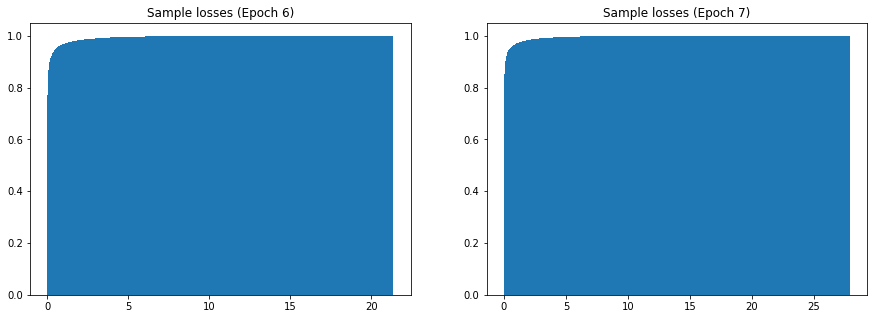

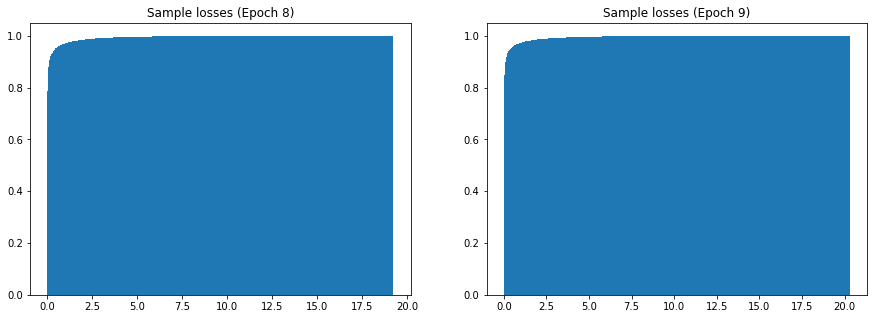

In [8]:
eda.all_hists_of_losses(loss_diff_from_avg=False, figsize=(15, 5), bins=1000, cumulative=True, density=True)